# Teste nº 6:
### Neste notebook, realizaremos o cálculo da redução ao Pólo para os casos em que (i) a inclinação está na faixa de instabilidade numérica, (ii) a declinação e (iii) ambos. Para isso, vamos primeiramente verificar em qual caso a RTP apresenta uma maior dificuldade para cálculo, e posteriormente propor (a) uma redução ao Equador magnético e (b) uma ampliação/redução de quadrante.

### O modelo é o mesmo utilizado nos testes anteriores, um prisma retangular, com dimensões $x_i = y_i = -400$, $x_f = y_f = 400$, $z_i = 100$ e $z_f = 600$, com magnetização unitária. O grid para cálculo da anomalia e transformações é regular, de tamanho $-1500$ a $1500$, com número de pontos igual a $100$.

In [1]:
# IMPORTANDO OS MODULOS NECESSARIOS
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf
from codes.plot import draw_prism
from codes.auxiliars import addnoise

In [2]:
# DEFINE: NUMERO DE PONTOS, GRID, DIMENSOES DO PRISMA
n = 100
x = np.linspace(-1500, 1500, n)
y = x
z = -100.
X, Y = np.meshgrid(x, y)

model = (-400., 400., -400., 400., 100., 600., 1.75)
area = model[:4]

In [3]:
# IMPORTA OS MODULOS DE ESTATISTICA
from codes.statistical import analysis

## Caso 1: $I = 8º$ e $D = 40º$.

In [14]:
# DEFINE AS DIRECOES DE INCLINACAO E DECLINACAO
# PARA O CAMPO REGIONAL
field = (35., -35.)
# PARA A FONTE
inc, dec = 8., 40.

# CALCULO DA ANOMALIA
tf = prism_tf(X, Y, z, model, (inc, dec), field)

In [15]:
print 'Anomalia magnetica (sem ruido):'
_ = analysis(tf, 'nT')

Anomalia magnetica (sem ruido):
Minimum:    -164.0008 nT
Maximum:    206.9913 nT
Mean value: -0.5204 nT
Variation:  370.9921 nT


In [16]:
# ADICIONA RUIDO AO DADO
tfnoise = addnoise(tf, 1., 0.2)

In [17]:
print 'Anomalia magnetica (com ruido):'
_ = analysis(tfnoise, 'nT')

Anomalia magnetica (com ruido):
Minimum:    -162.9095 nT
Maximum:    207.9137 nT
Mean value: 0.4810 nT
Variation:  370.8232 nT


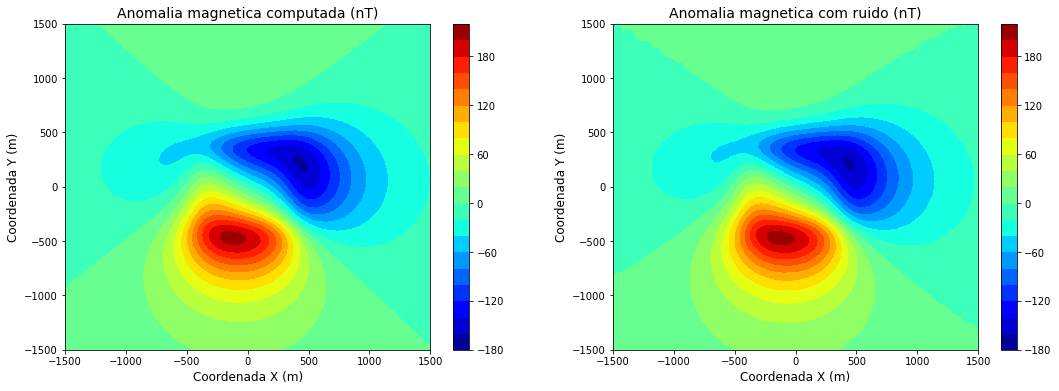

In [18]:
# PLOTA OS MAPAS DE ANOMALIA MAGNETICA
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
#draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.title('Anomalia magnetica computada (nT)' , fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 12)
plt.ylabel('Coordenada Y (m)', fontsize = 12)
plt.legend(loc = 'upper left')
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(Y, X, tfnoise, 20, cmap = plt.cm.jet)
#draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.title('Anomalia magnetica com ruido (nT)' , fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 12)
plt.ylabel('Coordenada Y (m)', fontsize = 12)
plt.legend(loc = 'upper left')
plt.colorbar()

plt.show()

In [19]:
from codes.filtering import reduction

In [20]:
# CÁLCULO DA REDUÇÃO AO POLO PARA OS VALORES DE INCLINAÇÃO E DECLINAÇÃO
rtp1 = reduction(x, y, tf, field, (inc, dec))
rtp2 = reduction(x, y, tf, field, (-inc, dec - 180.))
rtp3 = reduction(x, y, tf, field, (-inc, dec + 180.))
rtp4 = reduction(x, y, tf, field, (dec, inc))

codes/auxiliars.py:190: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


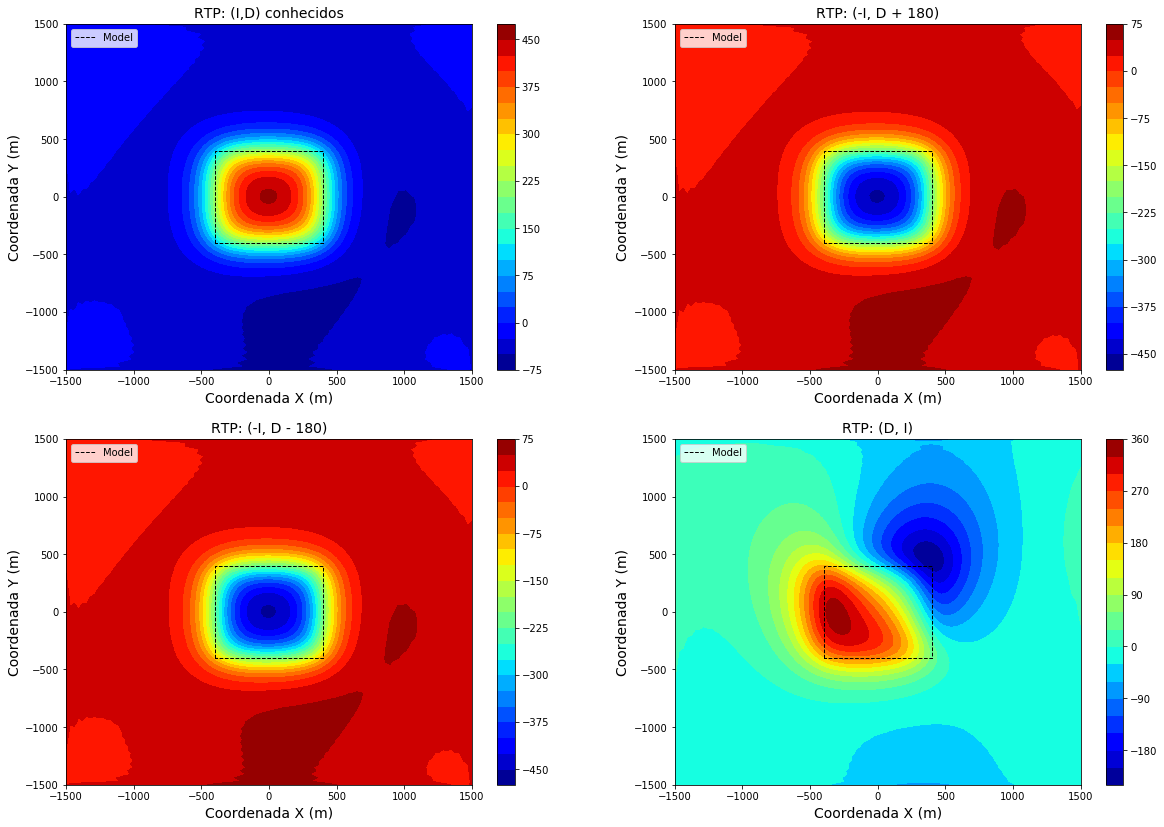

In [21]:
plt.close('all')
plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, rtp1, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (I,D) conhecidos', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, rtp2, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (-I, D + 180)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.contourf(Y, X, rtp3, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (-I, D - 180)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(Y, X, rtp4, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (D, I)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.show()

## Caso 2: $I = 40º$ e $D = 8º$.

In [31]:
# DEFINE AS DIRECOES DE INCLINACAO E DECLINACAO
# PARA O CAMPO REGIONAL
field = (35., -35.)
# PARA A FONTE
inc, dec = 40., 8.

# CALCULO DA ANOMALIA
tf = prism_tf(X, Y, z, model, (inc, dec), field)

In [32]:
print 'Anomalia magnetica (sem ruido):'
_ = analysis(tf, 'nT')

Anomalia magnetica (sem ruido):
Minimum:    -182.3172 nT
Maximum:    317.0812 nT
Mean value: 2.8810 nT
Variation:  499.3984 nT


In [33]:
# ADICIONA RUIDO AO DADO
tfnoise = addnoise(tf, 2., 0.2)

In [34]:
print 'Anomalia magnetica (com ruido):'
_ = analysis(tfnoise, 'nT')

Anomalia magnetica (com ruido):
Minimum:    -180.4593 nT
Maximum:    318.9645 nT
Mean value: 4.8804 nT
Variation:  499.4238 nT


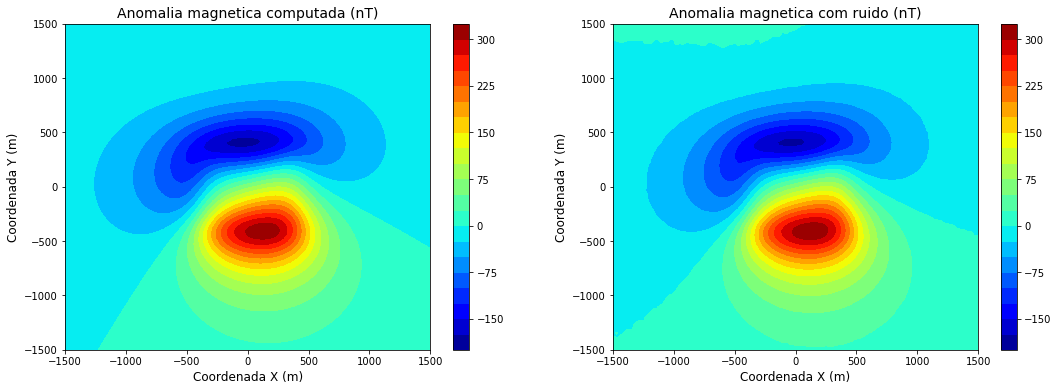

In [26]:
# PLOTA OS MAPAS DE ANOMALIA MAGNETICA
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
#draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.title('Anomalia magnetica computada (nT)' , fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 12)
plt.ylabel('Coordenada Y (m)', fontsize = 12)
plt.legend(loc = 'upper left')
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(Y, X, tfnoise, 20, cmap = plt.cm.jet)
#draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.title('Anomalia magnetica com ruido (nT)' , fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 12)
plt.ylabel('Coordenada Y (m)', fontsize = 12)
plt.legend(loc = 'upper left')
plt.colorbar()

plt.show()

In [27]:
# CÁLCULO DA REDUÇÃO AO POLO PARA OS VALORES DE INCLINAÇÃO E DECLINAÇÃO
rtp1 = reduction(x, y, tf, field, (inc, dec))
rtp2 = reduction(x, y, tf, field, (-inc, dec - 180.))
rtp3 = reduction(x, y, tf, field, (-inc, dec + 180.))
rtp4 = reduction(x, y, tf, field, (dec, inc))

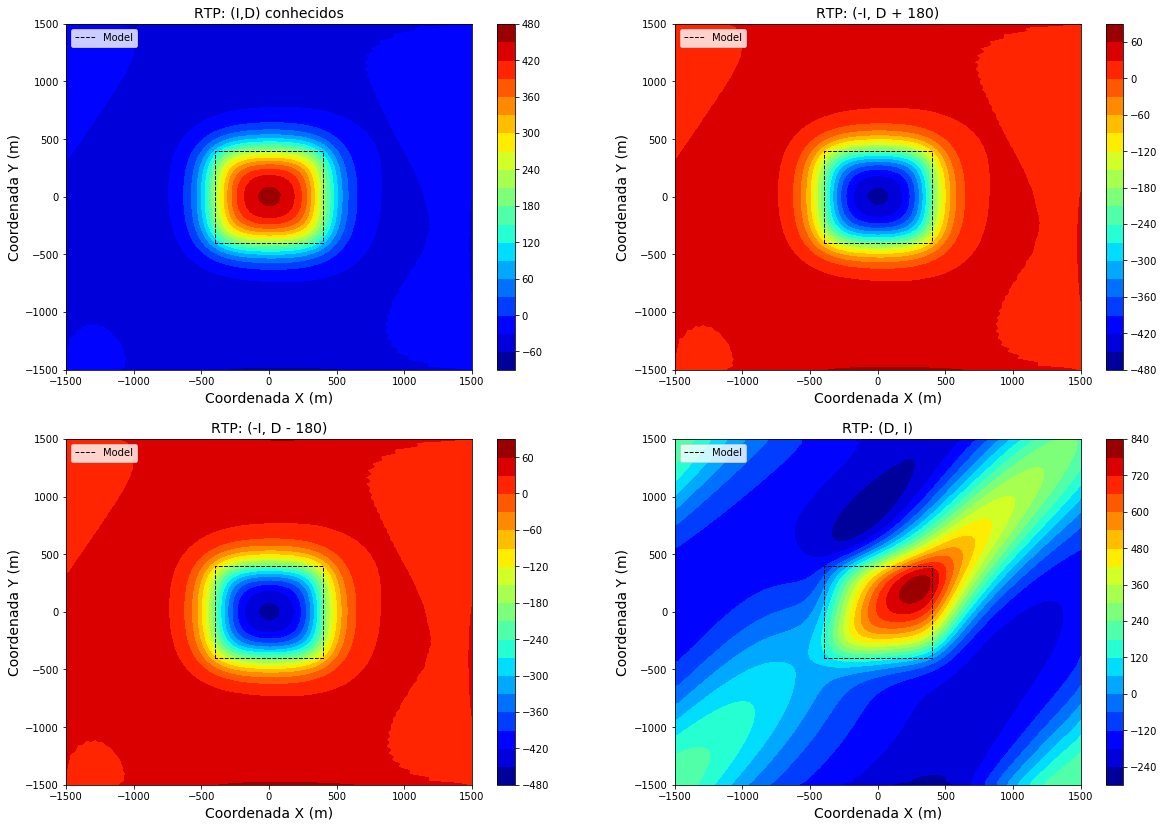

In [28]:
plt.close('all')
plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, rtp1, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (I,D) conhecidos', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, rtp2, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (-I, D + 180)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.contourf(Y, X, rtp3, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (-I, D - 180)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(Y, X, rtp4, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (D, I)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.show()

## Caso

In [35]:
# DEFINE AS DIRECOES DE INCLINACAO E DECLINACAO
# PARA O CAMPO REGIONAL
field = (35., -35.)
# PARA A FONTE
inc, dec = 8., 8.

In [36]:
# CALCULO DA ANOMALIA
tf = prism_tf(X, Y, z, model, (inc, dec), field)

In [37]:
print 'Anomalia magnetica (sem ruido):'
_ = analysis(tf, 'nT')

Anomalia magnetica (sem ruido):
Minimum:    -226.1928 nT
Maximum:    207.3855 nT
Mean value: -4.4864 nT
Variation:  433.5784 nT


In [38]:
# ADICIONA RUIDO AO DADO
tfnoise = addnoise(tf, 2.5, 0.25)

In [40]:
print 'Anomalia magnetica (com ruido):'
_ = analysis(tfnoise, 'nT')

Anomalia magnetica (com ruido):
Minimum:    -223.7462 nT
Maximum:    210.1802 nT
Mean value: -1.9852 nT
Variation:  433.9264 nT


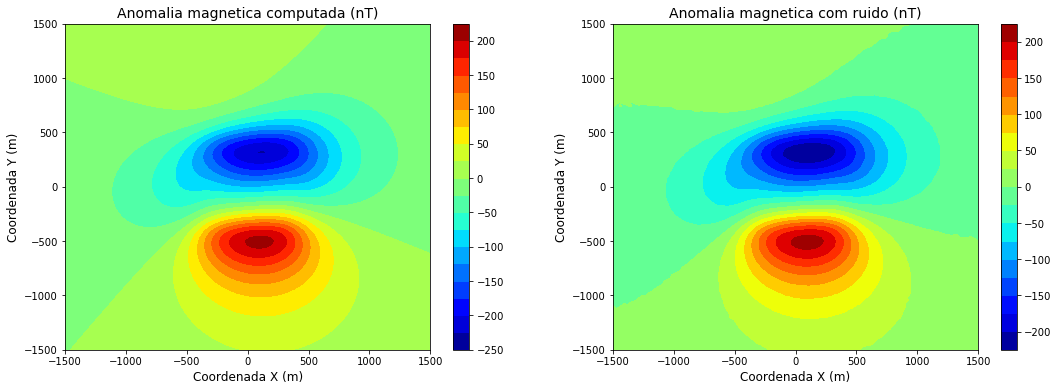

In [41]:
# PLOTA OS MAPAS DE ANOMALIA MAGNETICA
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
#draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.title('Anomalia magnetica computada (nT)' , fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 12)
plt.ylabel('Coordenada Y (m)', fontsize = 12)
plt.legend(loc = 'upper left')
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(Y, X, tfnoise, 20, cmap = plt.cm.jet)
#draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.title('Anomalia magnetica com ruido (nT)' , fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 12)
plt.ylabel('Coordenada Y (m)', fontsize = 12)
plt.legend(loc = 'upper left')
plt.colorbar()

plt.show()

In [42]:
# CÁLCULO DA REDUÇÃO AO POLO PARA OS VALORES DE INCLINAÇÃO E DECLINAÇÃO
rtp1 = reduction(x, y, tf, field, (inc, dec))
rtp2 = reduction(x, y, tf, field, (-inc, dec - 180.))
rtp3 = reduction(x, y, tf, field, (-inc, dec + 180.))
rtp4 = reduction(x, y, tf, field, (dec, inc))

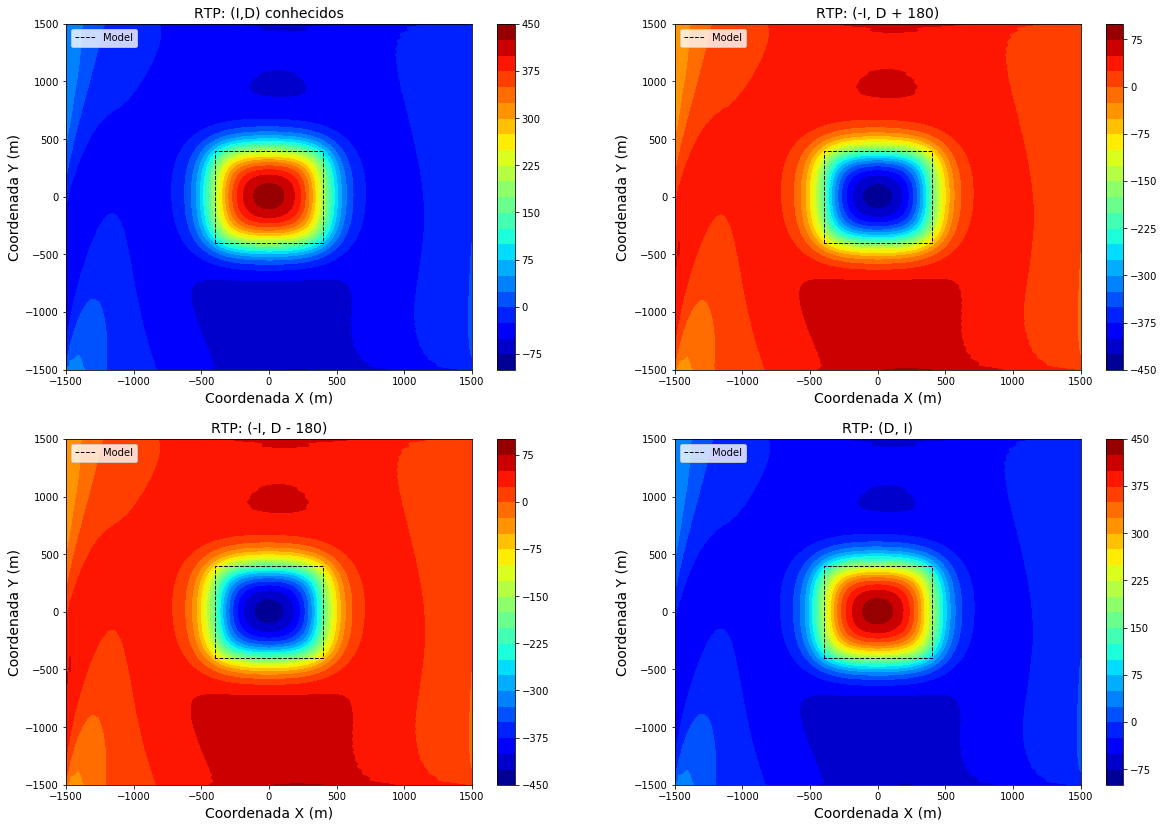

In [43]:
plt.close('all')
plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, rtp1, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (I,D) conhecidos', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, rtp2, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (-I, D + 180)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.contourf(Y, X, rtp3, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (-I, D - 180)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(Y, X, rtp4, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Model', xy2ne = True)
plt.title('RTP: (D, I)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.show()